In [27]:
import sys
sys.path.append('..')

In [28]:
from src import *

In [29]:
face_images = get_images_from_folder('synth-faces')
cat_images  = get_images_from_folder('cats')

In [30]:
face_sampler = ImageSampleGenerator(images = face_images, sample_size=16)
cat_sampler  = ImageSampleGenerator(images = cat_images,  sample_size=16)

In [31]:
face_matcher = PatternMatcher(16, face_sampler)
cat_matcher  = PatternMatcher(16, cat_sampler)

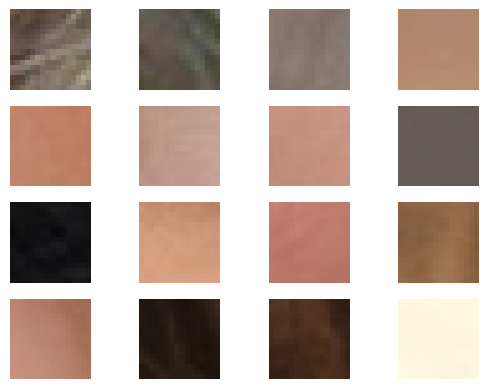

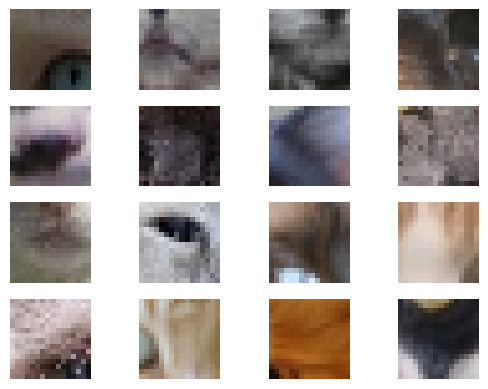

In [32]:
plot_image_grid(face_matcher.patterns)
plot_image_grid(cat_matcher.patterns)

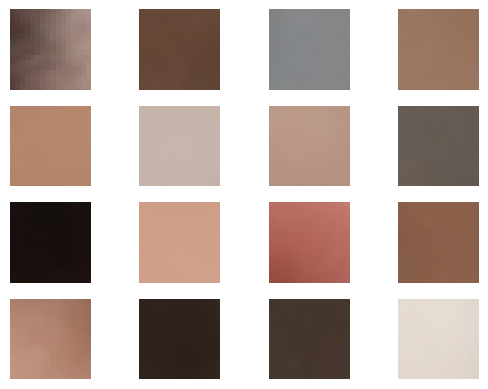

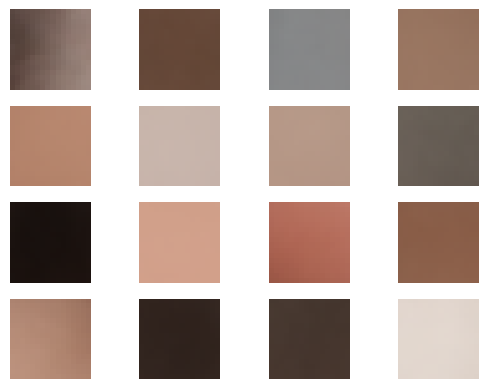

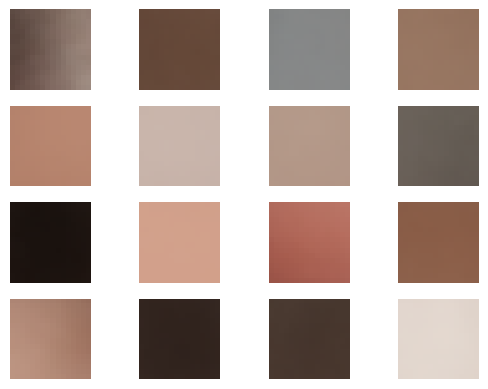

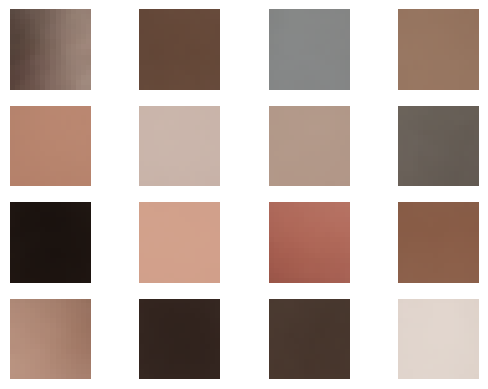

In [33]:
# Train the face matcher

# TODO: swap i / j in all ipynb files
for i in range(4):
    for j in range(1000):
        face_matcher.train_sample()
    plot_image_grid(face_matcher.patterns)

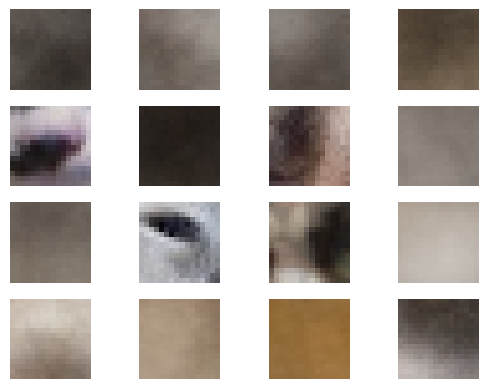

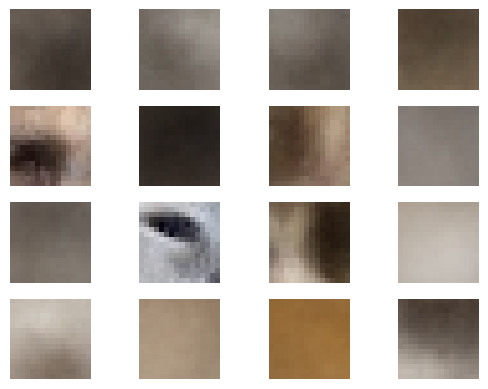

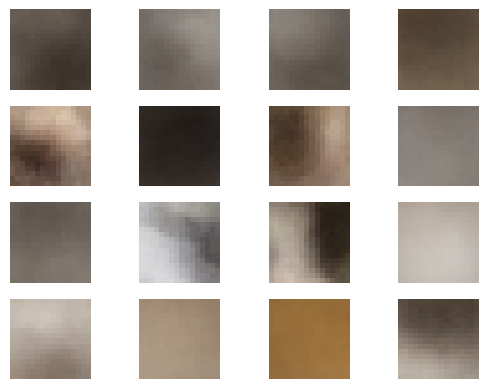

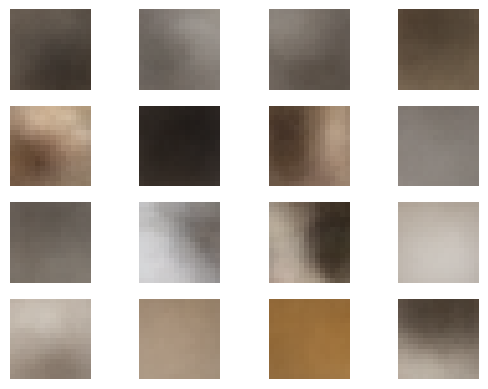

In [34]:
# Train the cat matcher

for i in range(4):
    for j in range(1000):
        cat_matcher.train_sample()
    plot_image_grid(cat_matcher.patterns)

In [ ]:
# Test the naive classifier training method above
# Takes a while on account of the size of the synth-faces images
# Perhaps a vanilla difference margin is not appropriate here, to get a good sense of scale.

for i in range(5):
    cat_image  = random.choice(cat_images)

    cat_score  = np.sum(cat_matcher.get_activation_map(cat_image))
    face_score = np.sum(face_matcher.get_activation_map(cat_image))

    print(f'For cat image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}')

    face_image = random.choice(face_images)

    cat_score  = np.sum(cat_matcher.get_activation_map(face_image))
    face_score = np.sum(face_matcher.get_activation_map(face_image))

    print(f'For face image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}')

    

For cat image: cat score = 30972.68793606758, face score = 29955.73242405057, predicted: cat by a margin of 1016.9555120170116
For face image: cat score = 12682411.87814425, face score = 12462374.615862519, predicted: cat by a margin of 220037.26228173077
For cat image: cat score = 29335.09189236164, face score = 28582.713784635067, predicted: cat by a margin of 752.378107726574
For face image: cat score = 12388925.16865918, face score = 12137476.39373973, predicted: cat by a margin of 251448.77491945028
For cat image: cat score = 28182.68622621894, face score = 27668.423645600677, predicted: cat by a margin of 514.2625806182623
For face image: cat score = 12712611.190856755, face score = 12448885.884256944, predicted: cat by a margin of 263725.3065998107
For cat image: cat score = 29226.130021721125, face score = 28657.174488425255, predicted: cat by a margin of 568.9555332958698
For face image: cat score = 12461523.272741377, face score = 12201525.90231274, predicted: cat by a margin

In [ ]:
# Here we see all humans are secretly undercover cats.
# Either that or the activation map comparison function is wrong.

In [ ]:
# Test again, this time taking the max of each channel and summing
# This test is larger, takes an estumate of 16 minutes to run with the current activation mapping algorithm

for i in range(20):
    cat_image  = random.choice(cat_images)

    cat_score  = np.sum(np.max(cat_matcher.get_activation_map(cat_image),  axis = -1))
    face_score = np.sum(np.max(face_matcher.get_activation_map(cat_image), axis = -1))

    print(f'For cat image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}, correct: {cat_score > face_score}')

    face_image = random.choice(face_images)

    cat_score  = np.sum(np.max(cat_matcher.get_activation_map(face_image),  axis = -1))
    face_score = np.sum(np.max(face_matcher.get_activation_map(face_image), axis = -1))

    print(f'For face image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}, correct: {face_score > cat_score}')

    

For cat image: cat score = 658.2396584749222, face score = 650.7488423585892, predicted: cat by a margin of 7.490816116333008
For face image: cat score = 14979.010799825191, face score = 15394.594764471054, predicted: face by a margin of 415.5839646458626
For cat image: cat score = 674.6400957107544, face score = 673.2900832295418, predicted: cat by a margin of 1.350012481212616
For face image: cat score = 14961.695946753025, face score = 15385.82359713316, predicted: face by a margin of 424.1276503801346
For cat image: cat score = 639.3795733451843, face score = 644.8867056965828, predicted: face by a margin of 5.507132351398468
For face image: cat score = 14993.877290964127, face score = 15291.561346888542, predicted: face by a margin of 297.6840559244156
For cat image: cat score = 663.9568358659744, face score = 645.272675216198, predicted: cat by a margin of 18.68416064977646
For face image: cat score = 14929.382286429405, face score = 15228.654769897461, predicted: face by a margi